In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [27]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [28]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [29]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

text = ['Comprei um produto ótimo','Comprei um produto ruim']

vectorize = CountVectorizer()

bag_of_words = vectorize.fit_transform(text)



In [30]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [31]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns= vectorize.get_feature_names_out())

In [32]:
sparse_matrix

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [33]:
vectorize = CountVectorizer(lowercase=False,max_features=50)

bag_of_words = vectorize.fit_transform(df.avaliacao)

print(bag_of_words.shape)

(15501, 50)


In [34]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns= vectorize.get_feature_names_out())

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(bag_of_words,df.sentimento, random_state=4978)

In [37]:
#!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Classes after encoding:", label_encoder.classes_)


Classes after encoding: ['negativo' 'positivo']


In [38]:
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(auc)

NameError: name 'auc' is not defined

In [66]:
def text_classifier(text, column_transcription, target):
    vectorize = CountVectorizer(lowercase=False, max_features=100)
    bag_of_words = vectorize.fit_transform(text[column_transcription])
    X_train, X_test, y_train,y_test = train_test_split(bag_of_words,df.sentimento, random_state=4978)
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    xgboost =xgb.XGBClassifier(enable_categorical=True)
    xgboost.fit(X_train,y_train)
    accuracy = xgboost.score(X_test,y_test)
    return print(f"Model accuracy'{column_transcription}': {accuracy * 100:.2f}%")

In [40]:
#!pip install wordcloud # word cloud 
from wordcloud import WordCloud

all_words = [text for text in df.avaliacao] 
all_words = ' '.join([text for text in df.avaliacao])

In [41]:
word_cloud = WordCloud(collocations=False).generate(all_words)

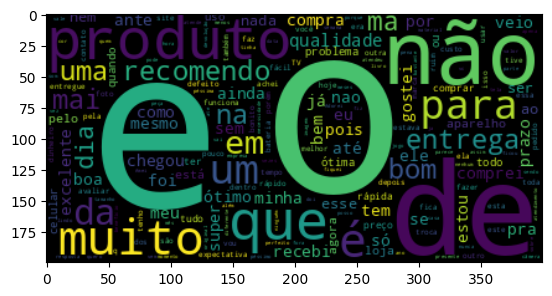

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [43]:
def word_cloud(df, column_text, sentiment):
    text_sentiment = df.query(f"sentimento=='{sentiment}'")[column_text]
    join_text = ' '.join(text_sentiment)
    word_cloud = WordCloud(collocations=False).generate(join_text)
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

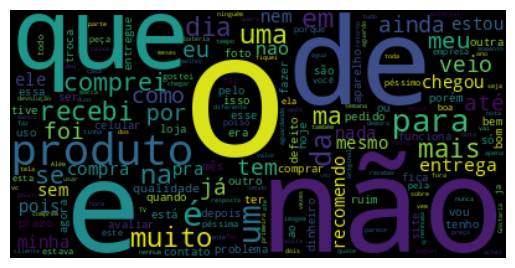

In [44]:
word_cloud(df,'avaliacao','negativo')

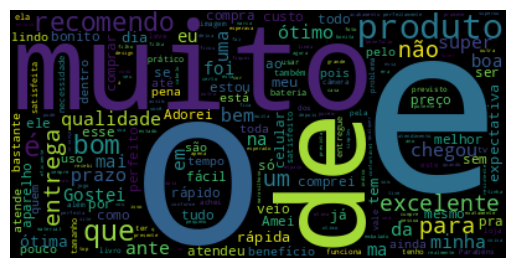

In [45]:
word_cloud(df,'avaliacao','positivo')

In [46]:
#!pip install nltk 
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/codespace/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_da

True

In [47]:
phrases = ['Um produto bom', 'Um produto ruim']

frequency = nltk.FreqDist(phrases)

frequency

FreqDist({'Um produto bom': 1, 'Um produto ruim': 1})

Tokenization

In [48]:
from nltk import tokenize 

phrase = 'O produto é excelente e a entrega foi muito rápida'

token_space = tokenize.WhitespaceTokenizer(
)
token_phrase = token_space.tokenize(phrase)

In [49]:
from nltk import tokenize 

token_space = tokenize.WhitespaceTokenizer(
)
token_phrase = token_space.tokenize(all_words)

In [50]:
frequency = nltk.FreqDist(token_phrase)
frequency

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [51]:
df_frequency = pd.DataFrame({'Word': list(frequency.keys()),
                            'Frequency':list(frequency.values()) })

In [54]:
df_frequency.nlargest(columns='Frequency',n=10)

,Word,Frequency
8,e,11813
6,o,10865
29,de,10280
19,a,8873
46,que,7657
22,não,7286
163,é,4786
63,produto,4765
177,com,4641
130,do,4583


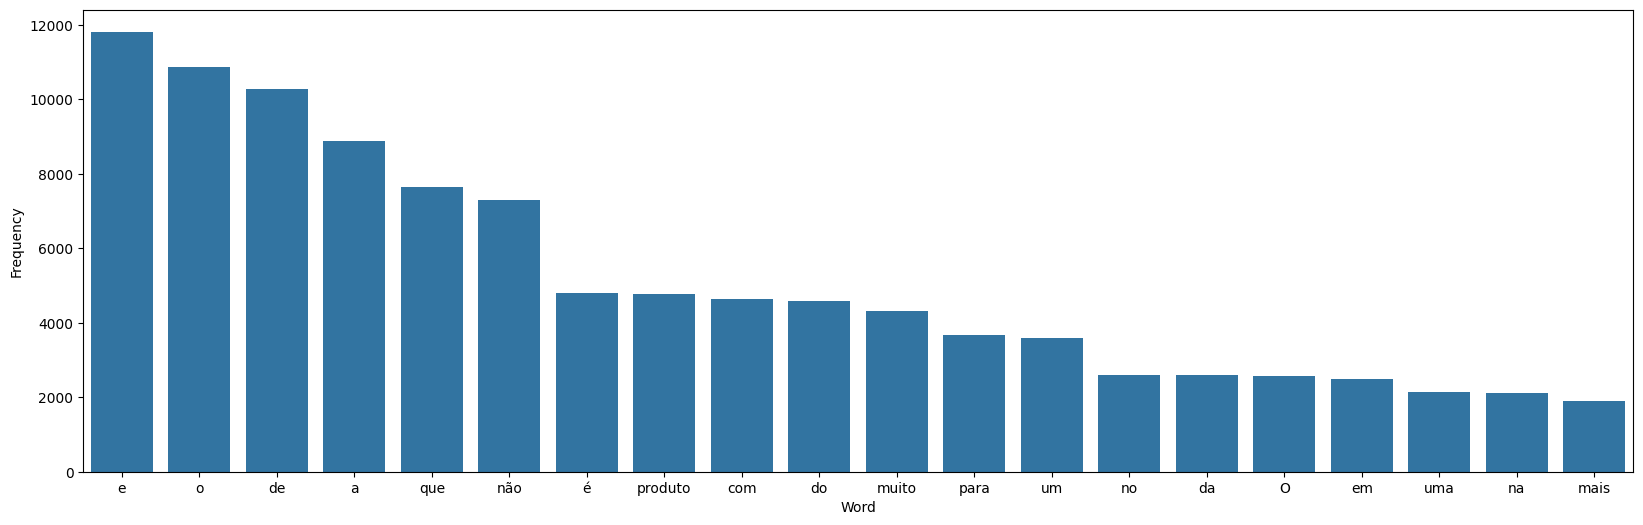

In [55]:
import seaborn as sns

plt.figure(figsize = (20,6))
ax = sns.barplot(data=df_frequency.nlargest(columns='Frequency',n=20),x='Word', y='Frequency')

In [56]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [57]:
stop_words

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [60]:
processed_phrase = []
for opinion in df.avaliacao:
    words_text = token_space.tokenize(opinion)
    new_phrase = [word for word in words_text if word not in stop_words]
    processed_phrase.append(' '.join(new_phrase))


df["treatment_1"] = processed_phrase

In [61]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento,treatment_1
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo,"Esse smartphone superou expectativas, recomendo"
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo,cheiro desagradavel!! pra incomoda nao recomen...
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo,"Eu fiz compra loja entregou produto, compra fe..."
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo,"Atendeu expectativas, achei luz ruim, nada dif..."
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo,"Gostei muito, achei ficou desejar qualidade fo..."


In [67]:
text_classifier(df, "treatment_1", "sentimento"),text_classifier(df, "avaliacao", "sentimento")

Model accuracy'treatment_1': 85.81%
Model accuracy'avaliacao': 86.22%


(None, None)